In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
columns = inspector.get_columns('measurement')
for i in columns:
    print(i['name'], i['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
columns = inspector.get_columns('station')
for i in columns:
    print(i['name'], i['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [105]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

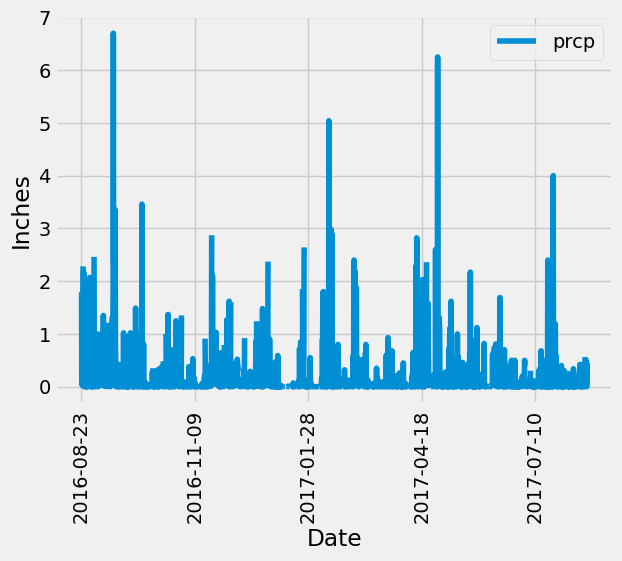

In [106]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
one_year_data = session.query(Measurement).filter(Measurement.date <= '2017-08-23', Measurement.date >= '2016-08-23')

# Save the query results as a Pandas DataFrame and set the index to the date column
#one_year_data = one_year_data.set_index('date')
date = []
prcp = []
for i in one_year_data:
    date.append(i.date)
    prcp.append(i.prcp)
    
one_year_pd = pd.DataFrame({'date':date, 'prcp':prcp})
one_year_pd = one_year_pd.set_index('date')

# Sort the dataframe by date
one_year_pd = one_year_pd.sort_values('date')
one_year_pd

# Use Pandas Plotting with Matplotlib to plot the data

one_year_pd.plot()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.show()

In [113]:
# Use Pandas to calcualte the summary statistics for the precipitation data
conn = engine.connect()
precipitation_data = pd.read_sql("SELECT * FROM measurement", conn)
precipitation_data#.describe()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


# Exploratory Station Analysis

In [116]:
# Design a query to calculate the total number stations in the dataset
tol_num_station = session.query(Measurement.station).distinct().count()
tol_num_station

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc())

for station, count in active_stations:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stat = [Measurement.station,
        func.max(Measurement.tobs),
        func.min(Measurement.tobs),
        func.avg(Measurement.tobs)]

session.query(*stat).filter(Measurement.station == 'USC00519281').all()

[('USC00519281', 85.0, 54.0, 71.66378066378067)]

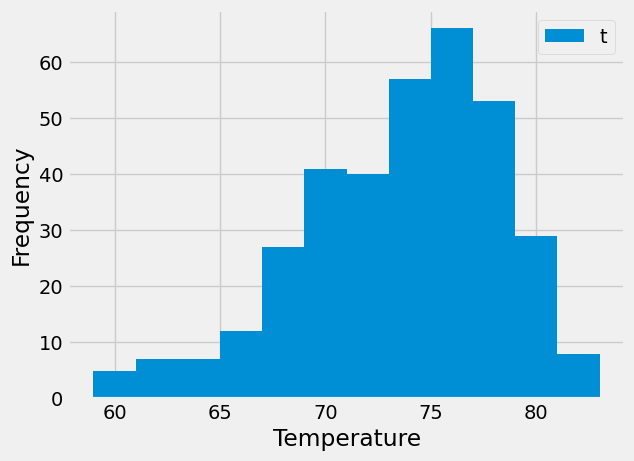

In [149]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_one_year = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281', Measurement.date <= '2017-08-23', Measurement.date >= '2016-08-23')

tobs = []
for i in most_active_one_year:
    tobs.append(i.tobs)

# plt.hist(tobs, bins=12)
# plt.show()

plt.hist(tobs, bins=12)
plt.legend('tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

In [150]:
# Close Session
session.close()